## Simple logistic regression with sklearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('task.csv')
df[:5]

,Experience,Success
0,14,0
1,29,0
2,6,0
3,25,1
4,18,1


In [4]:
df.shape

(25, 2)

In [5]:
df['Success'].value_counts()

0    14
1    11
Name: Success, dtype: int64

In [6]:
n = 25

In [7]:
y = df.Success
X = df.drop('Success',axis = 1)
X[:9]

,Experience
0,14
1,29
2,6
3,25
4,18
5,4
6,18
7,12
8,22


### Logistic Regression model

In [25]:
model = LogisticRegression(solver='lbfgs')
model.fit(X,y);

In [23]:
# coefficient b0
b0 = (model.intercept_)
print(b0)

[-3.04760123]


In [24]:
# coefficient b1
b1 = model.coef_
print(b1)

[[0.1608086]]


In [9]:
# predict the success of an analyst with 22 months of experience
newval = pd.DataFrame([[22]])
newval.shape

(1, 1)

In [10]:
# predict the probability of a success
model.predict_proba(newval)

array([[0.37984928, 0.62015072]])

In [11]:
# probab of success is 0.62

In [12]:
# predict outcome (0:failure, or 1:success)
model.predict(newval)

array([1])

In [13]:
# model predicts a success:1

### odds ratio

In [26]:
odds_ratio = np.exp(b1)
odds_ratio

array([[1.17446016]])

In [27]:
# Odds of success increase by 17.44% with each additional month of experience

### Plot logistic regression function

In [16]:
np.max(X.values)

32

In [37]:
df2 = pd.DataFrame()
xaxis = list(range(32))
df2['xaxis'] = xaxis
df2[:5]

,xaxis
0,0
1,1
2,2
3,3
4,4


In [18]:
y_proba = model.predict_proba(df2)[:,1]
df2['y_proba'] = y_proba
df2[:5]

,xaxis,y_proba
0,0,0.045321
1,1,0.052810
2,2,0.061457
3,3,0.071414
4,4,0.082840


In [ ]:
# df2 has the logistic curve coordinates

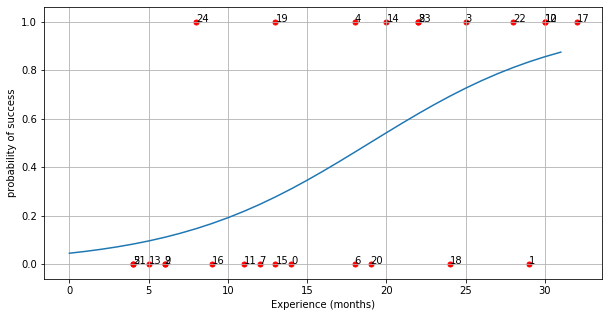

In [21]:
plt.figure(figsize=(10,5))
plt.scatter(X,y,s=25,c='r')
plt.plot(xaxis,y_proba)
# add point labels
for i in range(n):
    plt.annotate(i,(df.Experience[i],df.Success[i]))
plt.xlabel('Experience (months)')
plt.ylabel('probability of success')
plt.grid()

### error rate

In [22]:
yhat = model.predict(X)

In [23]:
df2 = pd.DataFrame()
df2['Success'] = y
df2['prediction'] = yhat
df2[:5]

,Success,prediction
0,0,0
1,0,1
2,0,0
3,1,1
4,1,0


In [24]:
# see prediction errors only
df2.loc[df2.Success!=df2.prediction]

,Success,prediction
1,0,1
4,1,0
18,0,1
19,1,0
20,0,1
24,1,0


In [25]:
# Confusion matrix

In [26]:
pd.crosstab(df2.prediction,df2.Success)

Success,0,1
prediction,,
0,11,3
1,3,8


In [27]:
# error rate

In [28]:
6/25

0.24

### Holdout Cross Validation

In [29]:
# split data into train (70%) and test (30%) sets

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.3,
                                                    shuffle = True,random_state=1)

In [48]:
X_test.shape

(8, 1)

In [45]:
model = LogisticRegression(solver="lbfgs").fit(X_train,y_train)
yhat = model.predict(X_test)

In [46]:
df3 = pd.DataFrame()
df3['Success'] = Y_test
df3['prediction'] = yhat.astype(int)
df3

,Success,prediction
14,1,1
13,0,0
18,0,1
24,1,0
7,0,0
8,1,1
12,1,1
15,0,0


### Test error rate

In [50]:
# test set prediction errors
df3.loc[df3.Success!=df3.prediction]

,Success,prediction
18,0,1
24,1,0


In [51]:
pd.crosstab(df3.prediction,df3.Success)

Success,0,1
prediction,,
0,3,1
1,1,3


In [36]:
2/8

0.25